# 3. Z -test for two population means (variances known and unequal)

## Objective

- To investigate the significance of the difference between the means of two populations.

- In layman's terms
    - We know that the difference between 2 population means is some value
    - Has that difference changed based on the sample means we have?

## Assumptions

- Variances $\sigma_1^2, \sigma_2^2$ are known for both populations
- The populations are normally distributed 
    - If not normal, the test may be regarded as approximate
- Sample sizes (both $n_1$ and $n_2$) are sufficiently large for central limit theorem assumption to hold
- All observations in the samples are i.i.d

## Method

- Assume 2 populations with means $\mu_1, \mu_2$ and standard deviations $\sigma_1, \sigma_2$
- We take independent samples of sizes $n_1, n_2$ from each population
- Using this, we compute sample means $\bar{x_1}, \bar{x_2}$
- The test statistic is $$Z = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{(\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2})}}$$

- As with `Test 1` and `Test 2` $Z$ follows a Gaussian distribution

### Proof that Z is a gaussian distribution

- See Proof section in `Test 2`, follows the same logic

## Example

- Problem 
    - Brand A of a jumbo-sized pack of potato crisp is known to have a more variable weight than brand B of potato crisp. 
    - Population variances are 0.000576 gm2 and 0.001089 gm2 respectively. 
    - Means are 80.02 gm and 79.98 gm respectively
    - Sample sizes are 13 and 8 respectively
    - The implication is that the population has the same mean for both brands

- Question
    - Is there a difference between the two brands in terms of the weights of the jumbo packs? 
        - 2.98 > 1.645, so reject null that the difference between two means are unchanged
    - Has the difference in weights between brand A and B gone up?
        - 2.98 > 1.96, so reject null that it has not gone up
    - Has the difference in weights between brand A and B gone down?
        - 2.98 > -1.96, so do not reject null that it is not changed
    

In [2]:
mu1 = 80
mu2 = 80
sigma1 = 0.000576**0.5
sigma2 = 0.001089**0.5
n1 = 13
n2 = 8
xbar1 = 80.02
xbar2 = 79.98

def compute_test_statistic(mu1, mu2, sigma1, sigma2, n1, n2, xbar1, xbar2):
    return ((xbar1 - xbar2) - (mu1 - mu2)) / ((sigma1**2 / n1) + (sigma2**2 / n2))**0.5

compute_test_statistic(mu1, mu2, sigma1, sigma2, n1, n2, xbar1, xbar2)

2.977846975345824

## Proof by simulation that test statistic is normal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MU1 = 5
MU2 = 3
SIGMA1 = 2
SIGMA2 = 7
SAMPLE_SIZE1 = 100
SAMPLE_SIZE2 = 200

xbar1 = np.array([
    np.random.normal(MU1, SIGMA1, SAMPLE_SIZE1).mean() for _ in range(10_000)
])

xbar2 = np.array([
    np.random.normal(MU2, SIGMA2, SAMPLE_SIZE2).mean() for _ in range(10_000)
])

-0.010270562942398177
0.9960983242522241


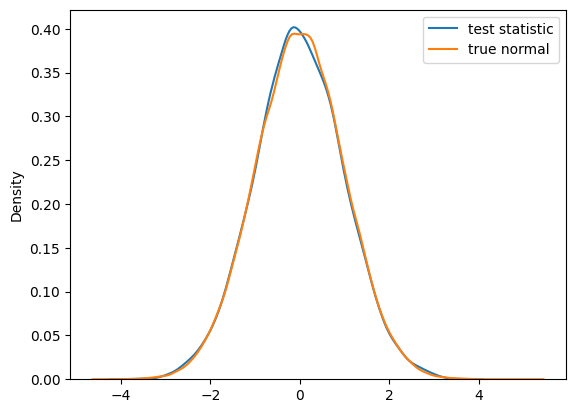

In [4]:
test_statistic_distribution = (
    ((xbar1 - xbar2) - (MU1 - MU2)) / \
    ((SIGMA1**2/SAMPLE_SIZE1 + SIGMA2**2/SAMPLE_SIZE2)**0.5)
)
normal_distribution = np.random.normal(0, 1, 10_0000)
print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(normal_distribution, label='true normal')
plt.legend()